In [83]:
import matplotlib.pyplot as plt 
import numpy as np              
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
train_path = '/Users/radhoda/PycharmProjects/Xray_Pneumonia_Classification/chest_xray/chest_xray/train'
test_path = '/Users/radhoda/PycharmProjects/Xray_Pneumonia_Classification/chest_xray/chest_xray/test'
valid_path = '/Users/radhoda/PycharmProjects/Xray_Pneumonia_Classification/chest_xray/chest_xray/val'

In [52]:
batch_size = 16

In [53]:
img_height = 500

In [54]:
img_weight = 500

In [55]:
# This will be used for the training set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# This will be used for the testing and valid sets
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [56]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )

Found 5216 images belonging to 2 classes.


In [57]:
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, 
      class_mode='binary',
      batch_size=batch_size
      )

Found 624 images belonging to 2 classes.


In [58]:
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 16 images belonging to 2 classes.


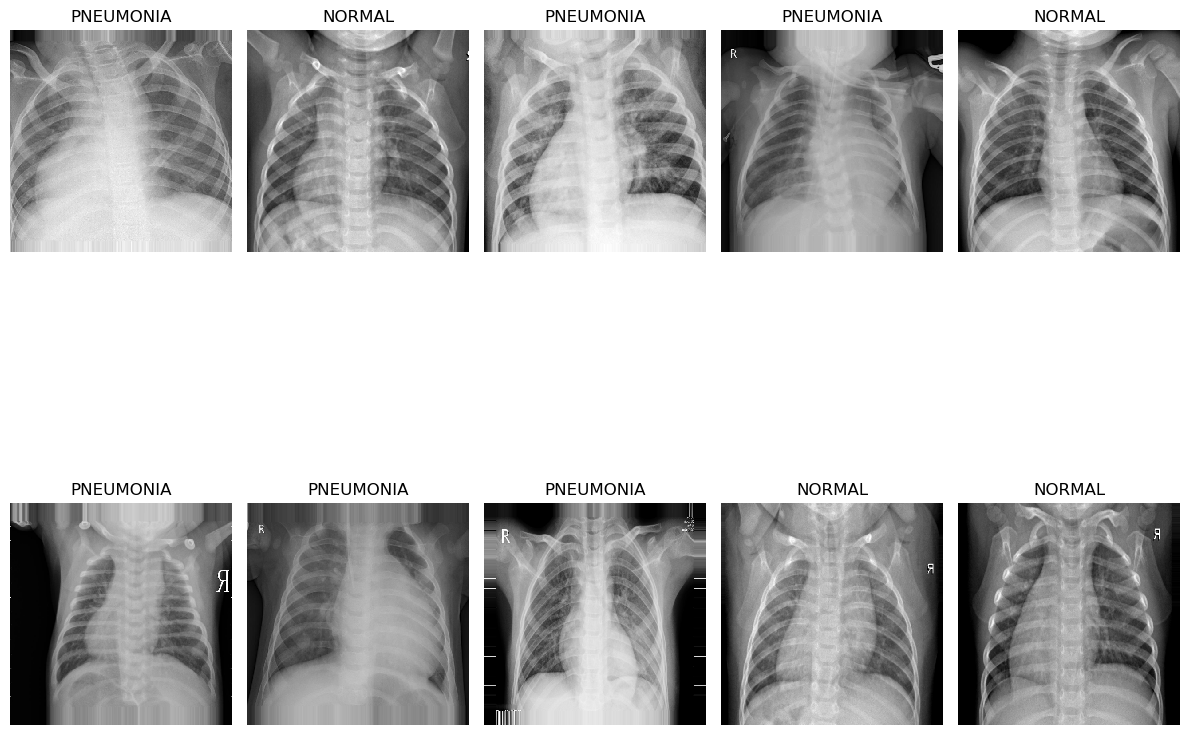

In [60]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:"NORMAL", 1:"PNEUMONIA"}
        plt.title(dic.get(Y_batch[0]))
        plt.axis("off")
        plt.imshow(np.squeeze(image),cmap="gray",interpolation="nearest")
        break
plt.tight_layout()
plt.show()

In [62]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 249, 249, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 123, 123, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 60, 60, 32)       

In [67]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [66]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [68]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [71]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [73]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train.classes), y=train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.9448173005219984, 1: 0.6730322580645162}


In [74]:
cnn.fit(train,epochs=10, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25
326/326 [==============================] - 708s 2s/step - loss: 0.4762 - accuracy: 0.6988 - val_loss: 0.7764 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/25
326/326 [==============================] - 1085s 3s/step - loss: 0.2343 - accuracy: 0.9026 - val_loss: 1.5442 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/25
326/326 [==============================] - ETA: 0s - loss: 0.2109 - accuracy: 0.9174
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
326/326 [==============================] - 1115s 3s/step - loss: 0.2109 - accuracy: 0.9174 - val_loss: 1.0818 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 4/25
326/326 [==============================] - 4292s 13s/step - loss: 0.1665 - accuracy: 0.9340 - val_loss: 0.6124 - val_accuracy: 0.6875 - lr: 3.0000e-04
Epoch 5/25
 99/326 [========>.....................] - ETA: 7:30 - loss: 0.1423 - accuracy: 0.9413

KeyboardInterrupt: 

<Axes: >

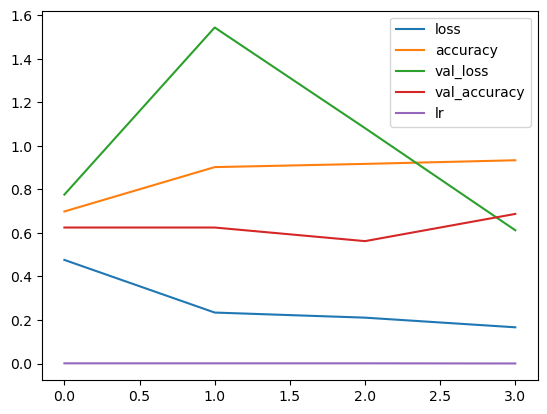

In [75]:
pd.DataFrame(cnn.history.history).plot()

In [76]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 17s 435ms/step - loss: 0.4526 - accuracy: 0.8718
The testing accuracy is : 87.17948794364929 %


In [77]:
preds = cnn.predict(test,verbose=1)

39/39 [==============================] - 19s 468ms/step


In [78]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<Axes: >

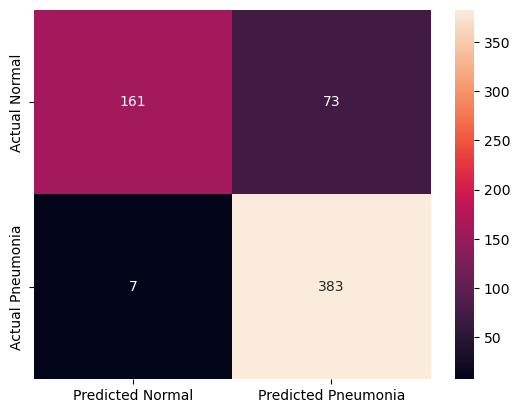

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [80]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.96      0.69      0.80       234
   PNEUMONIA       0.84      0.98      0.91       390

    accuracy                           0.87       624
   macro avg       0.90      0.84      0.85       624
weighted avg       0.88      0.87      0.87       624



(624, 500, 500, 1)
(624,)


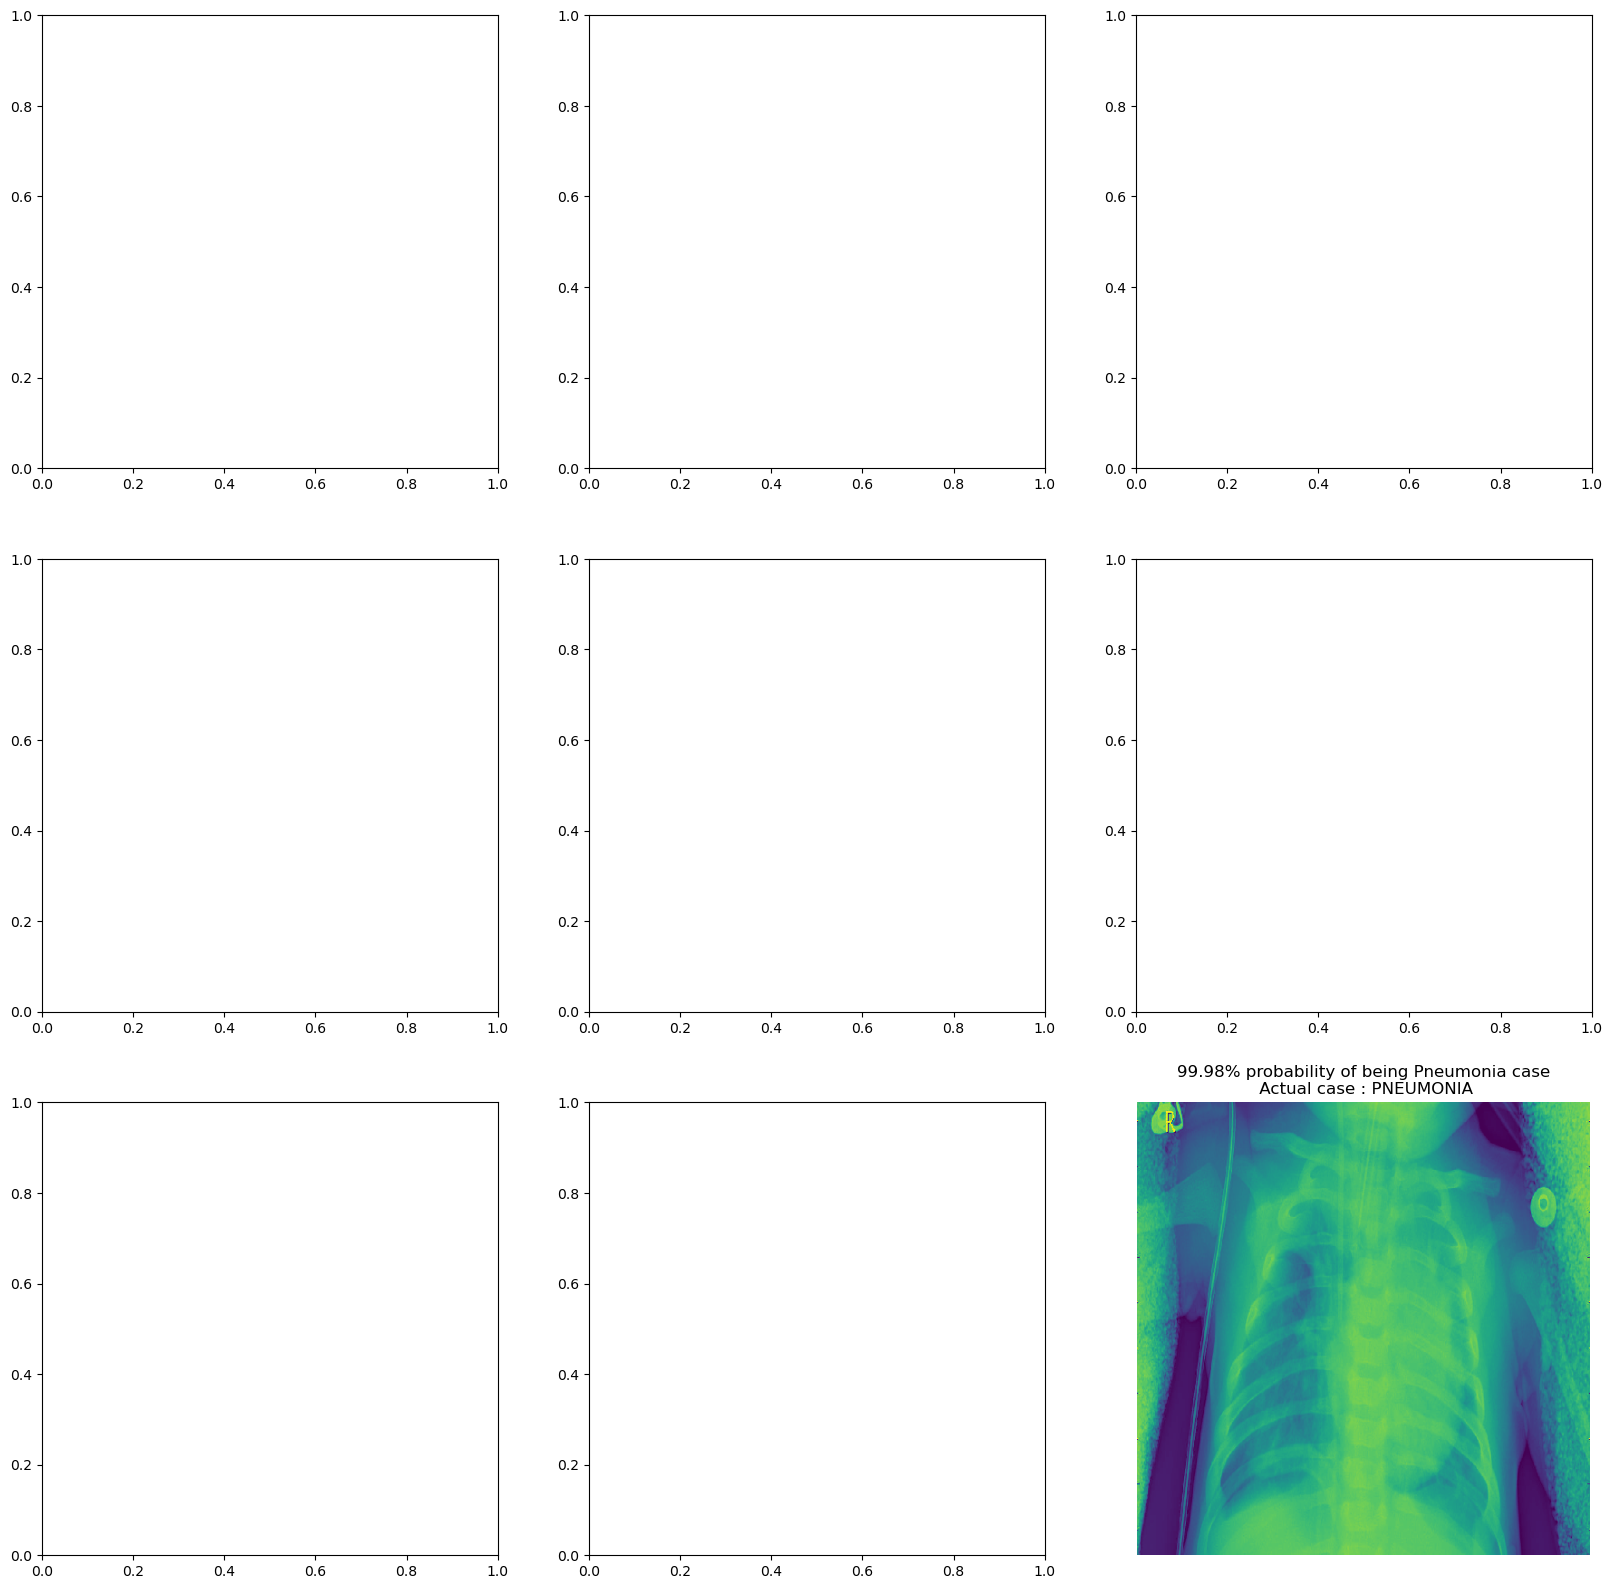

In [82]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)
#this little code above extracts the images from test Data iterator without shuffling the sequence
# x contains image array and y has labels 
dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
plt.imshow(np.squeeze(x[i]))
plt.axis('off')
plt.show()